<a href="https://colab.research.google.com/github/PaoloMadda01/PytorchFundamentals/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

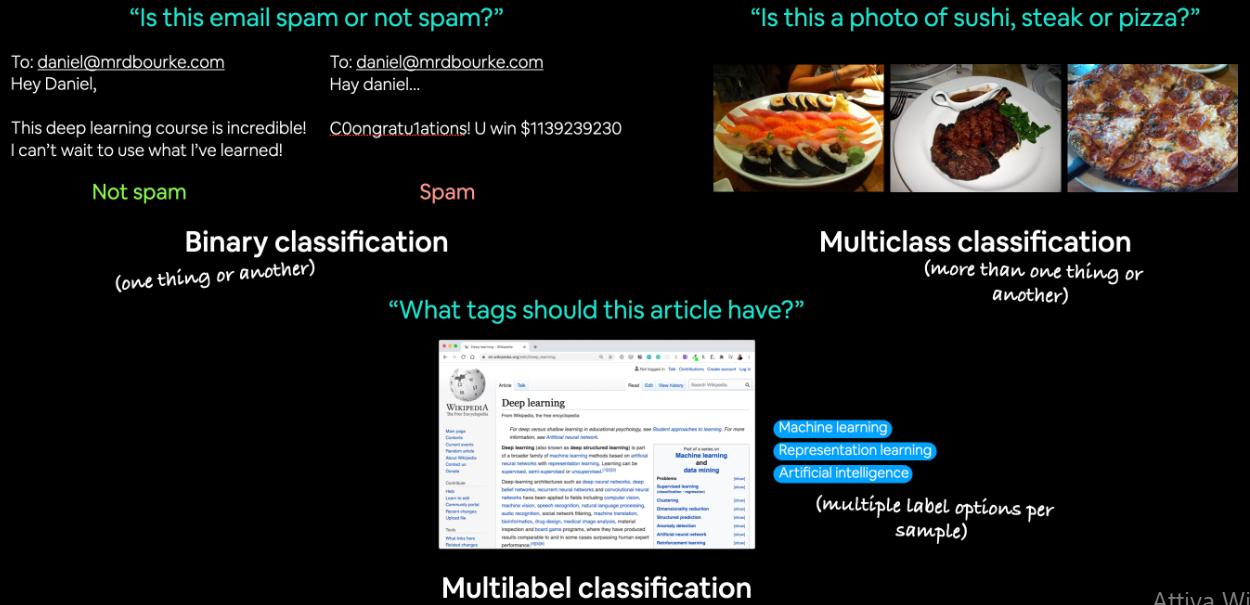

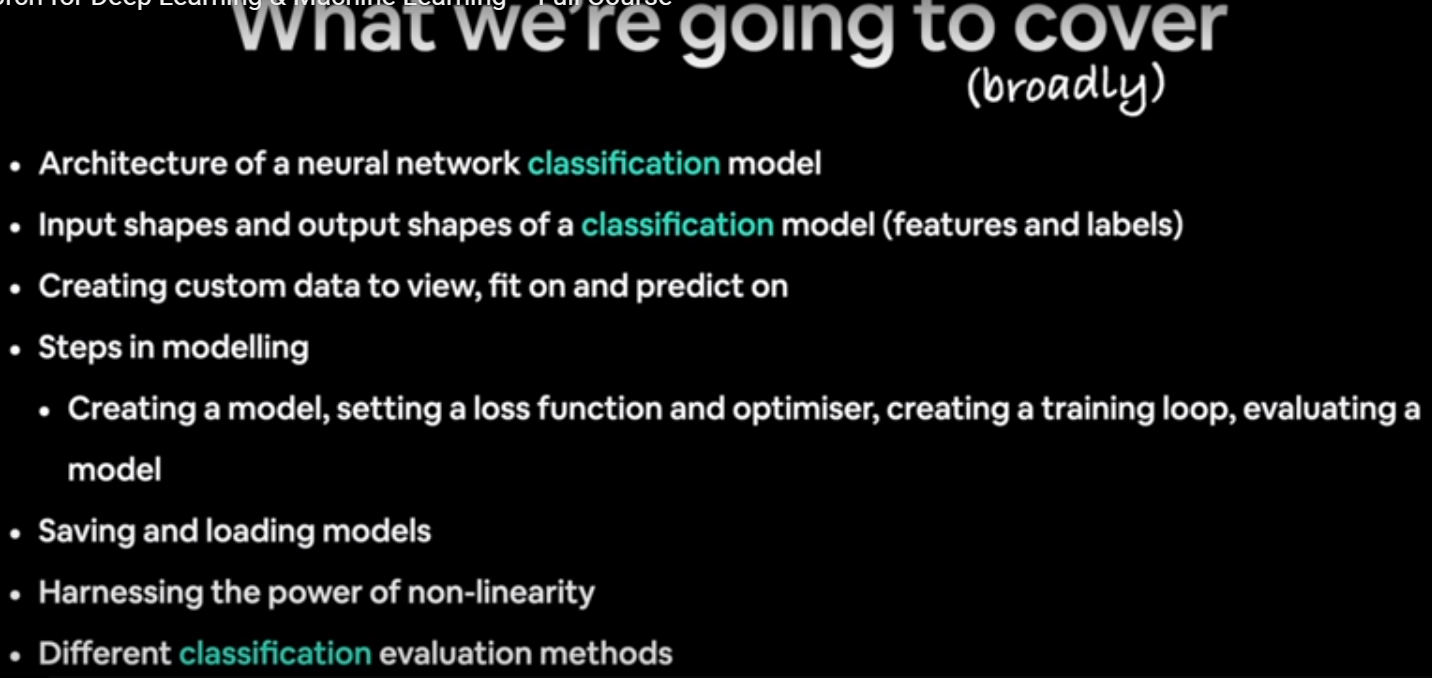

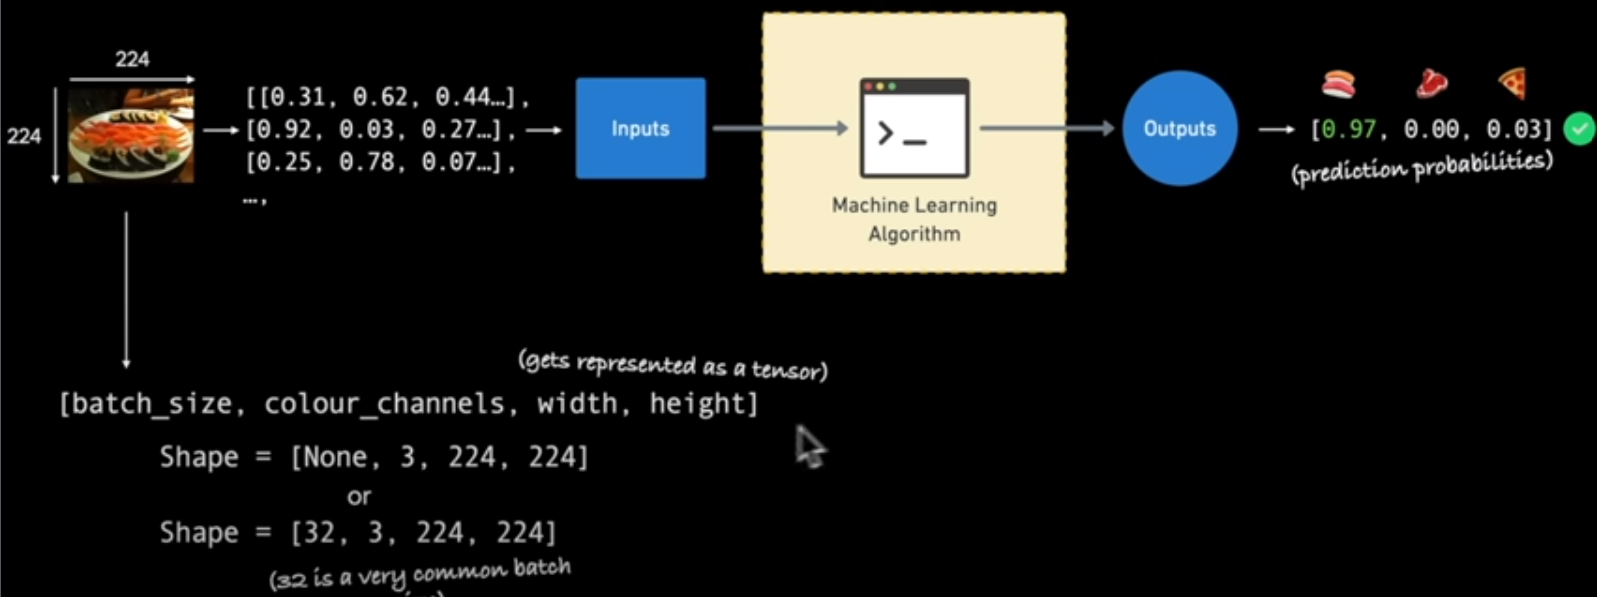

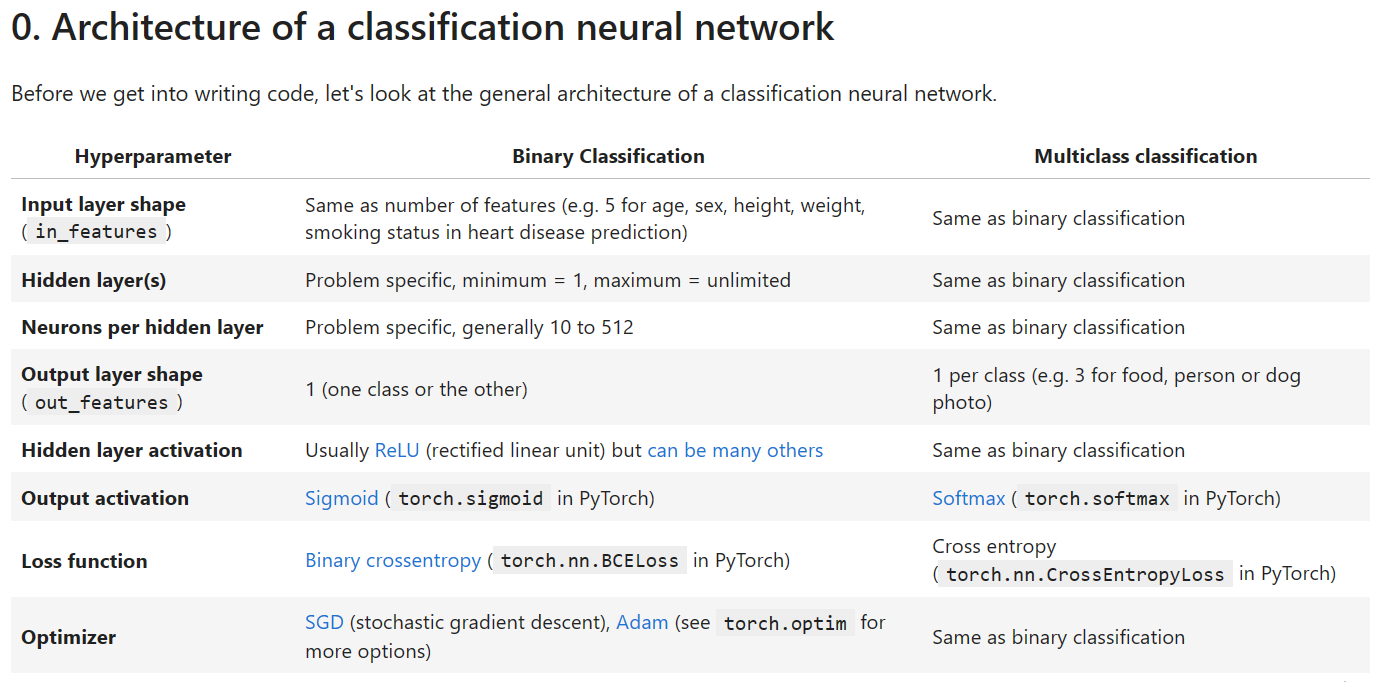

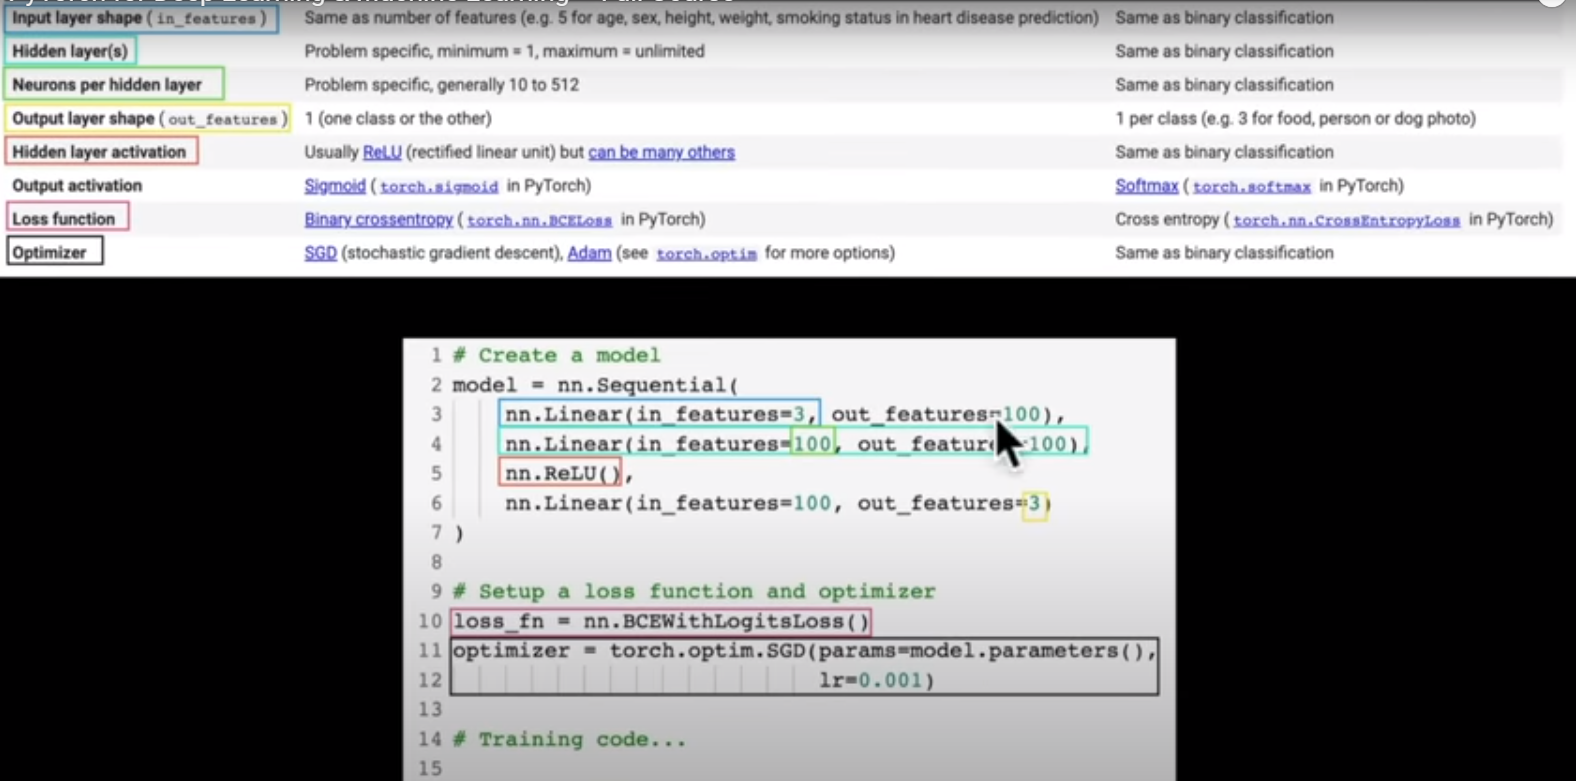

# 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

## 1. Make classification data and get it ready

In [793]:
import sklearn

In [794]:
from sklearn.datasets import make_circles

# Make 1000 salmples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [795]:
len(X), len(y)

(1000, 1000)

In [796]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [797]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0

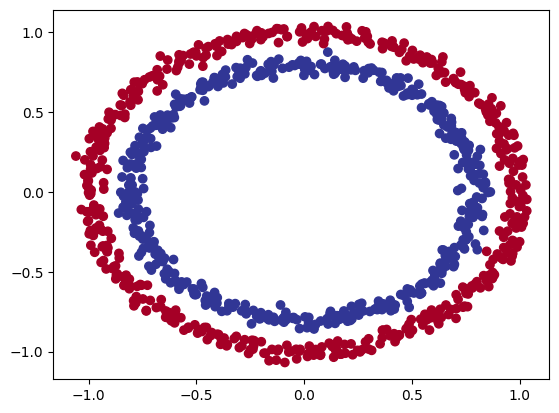

In [798]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note**: The data we're working with is often referred to as a toy dataset, a dataset is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [799]:
X.shape, y.shape  # y è scalare

((1000, 2), (1000,))

In [800]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


# 1.2 Turn data into tensors and create train and test splits

In [801]:
# Turn data into tensors
import torch
torch.__version__

'2.0.1+cu118'

In [802]:
type(X)

numpy.ndarray

In [803]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [804]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [805]:
torch.manual_seed(42)

In [806]:
# Split data intotraining and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test and 80% will be traing
                                                    random_state=42)

In [807]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

  1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
  2. Costruct a model (by subclassing nn.Module)
  3. Define a loss function and optimizer
  3. Create a training and test loop

In [808]:
# Import PyTorch
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we'we setup device agnostic code, let's create a model that:

1. Subclasses 'nn.Module' (almost all models in PyTorch subclass 'nn.Module')
2. Create 2 'nn.Linear()' layers that are capable of handling the shapes of our data
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [809]:
X_train.shape

torch.Size([800, 2])

In [810]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [811]:
# 1. Costruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Istantiate an istance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Le differenze principali tra LinearRegressionModel e CircleModelV0 riguardano la loro architettura e il tipo di problema che ciascuno risolve:

LinearRegressionModel (visto nel tutorial precedente):
1. È un modello di regressione lineare semplice che esegue una trasformazione lineare dell'input per ottenere l'output.
2. Ha solo due parametri, weights e bias, che vengono definiti manualmente come istanze di nn.Parameter. Questi parametri rappresentano i coefficienti di peso e il termine di bias per la regressione lineare.
3. L'input è bidimensionale (una singola feature) e l'output è anch'esso bidimensionale (una singola feature).


CircleModelV0:
1. È un modello più complesso con due strati lineari (nn.Linear) in cascata.
2. Ha più parametri: i pesi e i bias per entrambi i layer lineari layer_1 e layer_2.
3. L'input è bidimensionale (2 feature) e l'output è monodimensionale (una singola feature).
4. Può essere utilizzato per risolvere un problema più complesso rispetto alla regressione lineare, ad esempio, può essere impiegato per approssimare una funzione circolare con i dati in ingresso.



Il modello CircleModelV0 ha due layer lineari (nn.Linear) in cascata per creare una rappresentazione più complessa dell'input. Questo è noto come modello a due strati o modello multistrato. I due layer lineari svolgono funzioni specifiche all'interno del modello e aiutano ad aumentare la complessità e la capacità di rappresentazione del modello stesso.

Ecco cosa fanno i due layer lineari:

self.layer_1:

Questo è il primo layer lineare nel modello e ha 2 feature di input e 5 feature di output.

L'input per questo layer è il dato x passato al modello.

Il layer lineare esegue una trasformazione lineare dell'input utilizzando una matrice di pesi e un termine di bias per ottenere un'uscita con 5 feature. Questo si può rappresentare con l'equazione:

makefile
Copy code
output_layer_1 = layer_1_weights * x + layer_1_bias
L'output di self.layer_1 è una nuova rappresentazione dell'input con 5 feature.

self.layer_2:

Questo è il secondo layer lineare nel modello e ha 5 feature di input e 1 feature di output.

L'input per questo layer è l'output del layer precedente, ovvero la rappresentazione a 5 feature generata da self.layer_1.

Il layer lineare esegue una trasformazione lineare dell'input a 5 feature utilizzando una matrice di pesi e un termine di bias per ottenere un'uscita con 1 feature (che corrisponde alla previsione finale del modello).

Questo si può rappresentare con l'equazione:

makefile
Copy code
output_model = layer_2_weights * output_layer_1 + layer_2_bias
L'output di self.layer_2 rappresenta la previsione finale del modello sulla base dell'input fornito.

In sintesi, i due layer lineari in CircleModelV0 lavorano insieme per creare una rappresentazione più complessa dell'input. Il primo layer (self.layer_1) cattura le relazioni lineari iniziali tra le feature di input e genera una nuova rappresentazione con 5 feature. Il secondo layer (self.layer_2) prende questa rappresentazione a 5 feature e la utilizza per produrre l'output finale del modello, che è una previsione basata sulla trasformazione lineare delle feature di input. Questa architettura multistrato può aiutare il modello a catturare relazioni più complesse nei dati rispetto a un semplice modello lineare.

In [812]:
# 1. Costruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    #self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    #self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    #return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    return two_linear_layers(x)

# 4. Istantiate an istance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

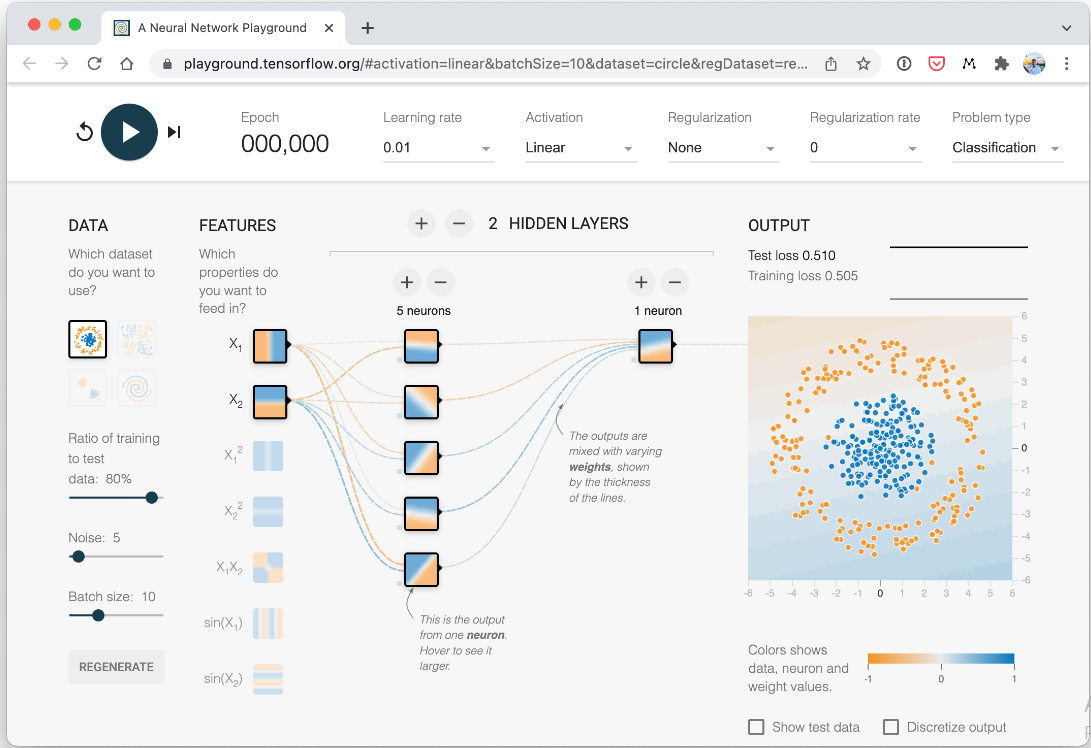

In [813]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [814]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]], device='cuda:0')),
             ('1.bias', tensor([0.1379], device='cuda:0'))])

In [815]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of preditions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 lables:\n{y_test[:10]}")

Length of preditions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760],
        [0.4158],
        [0.3764],
        [0.4404],
        [0.0688],
        [0.1532]], device='cuda:0')

First 10 lables:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [816]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer
We've setup a loss (also called a criterion or cost function) and optimizer before in notebook 01.

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, and the same applies to the Adam optimizer (torch.optim.Adam()).

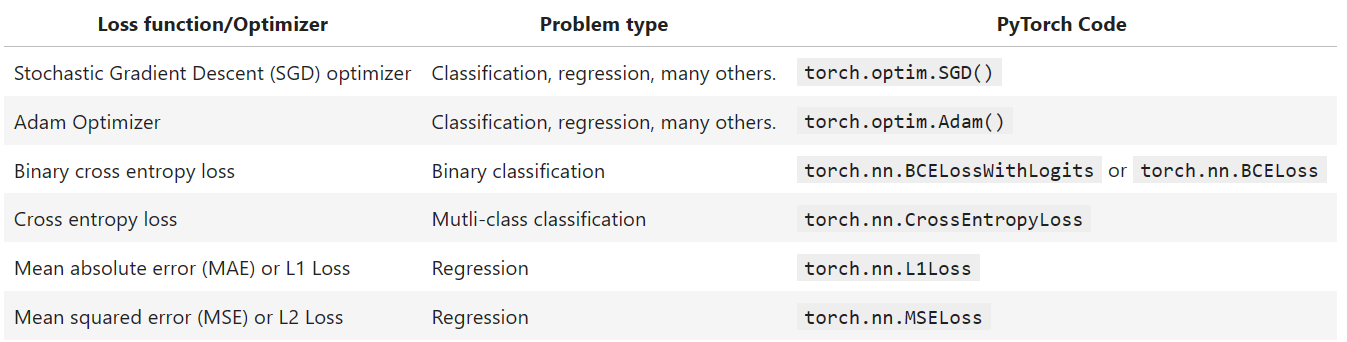

PyTorch has two binary cross entropy implementations:

torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).
Which one should you use?

The documentation for torch.nn.BCEWithLogitsLoss() states that it's more numerically stable than using torch.nn.BCELoss() after a nn.Sigmoid layer.

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of nn.Sigmoid and torch.nn.BCELoss() but that is beyond the scope of this notebook.

In [817]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [818]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

# 3. Train model

PyTorch training loop steps:
* Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
* Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
* Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
* Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
* Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

The raw outputs (unmodified) of this equation (
) and in turn, the raw outputs of our model are often referred to as logits.

That's what our model is outputing above when it takes in the input data (
 in the equation or X_test in the code), logits.

However, these numbers are hard to interpret.

We'd like some numbers that are comparable to our truth labels.

To get our model's raw outputs (logits) into such a form, we can use the sigmoid activation function.




Il testo in questione spiega il processo di andare dai logits prodotti dal modello alle probabilità di predizione e infine alle etichette di predizione.

* Logits: I logits rappresentano i valori di output grezzi del modello prima di essere trasformati in probabilità o etichette di predizione. Sono spesso associati a valori non normalizzati e non rappresentano ancora delle probabilità, ma piuttosto le "cifre" che il modello calcola per ciascuna classe o categoria.

* Probabilità di predizione: Per ottenere le probabilità di predizione, i logits vengono passati attraverso una funzione di attivazione. Nelle situazioni di classificazione binaria, spesso si utilizza la funzione sigmoide come attivazione, mentre nella classificazione multiclasse, la funzione di attivazione tipicamente utilizzata è la softmax. La funzione di attivazione normalizza i logits in modo che siano compresi tra 0 e 1 e rappresentino la probabilità stimata che un'istanza appartenga a una specifica classe. Ogni valore di probabilità è associato a una classe.

* Etichette di predizione: Una volta ottenute le probabilità di predizione, possiamo determinare le etichette di predizione per ciascuna istanza. Nella classificazione binaria, è possibile etichettare le istanze utilizzando una soglia, ad esempio, assegnando l'etichetta "1" a tutte le istanze con probabilità maggiore di 0.5 (e l'etichetta "0" altrimenti). Nella classificazione multiclasse, si seleziona la classe con la probabilità più alta come etichetta di predizione, utilizzando l'operazione argmax() per trovare l'indice della classe con la probabilità massima.

In [819]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760]], device='cuda:0', grad_fn=<SliceBackward0>)

They're the output of our forward() method.

Which implements two layers of nn.Linear() which internally calls the following equation:

The raw outputs (unmodified) of this equation (
) and in turn, the raw outputs of our model are often referred to as logits.

That's what our model is outputing above when it takes in the input data (
 in the equation or X_test in the code), logits.

However, these numbers are hard to interpret.

We'd like some numbers that are comparable to our truth labels.

To get our model's raw outputs (logits) into such a form, we can use the sigmoid activation function.

Let's try it out.

In [820]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5191],
        [0.5363],
        [0.5203],
        [0.5185],
        [0.5929]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Okay, it seems like the outputs now have some kind of consistency (even though they're still random).

They're now in the form of prediction probabilities (I usually refer to these as y_pred_probs), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:

If y_pred_probs >= 0.5, y=1 (class 1)
If y_pred_probs < 0.5, y=0 (class 0)
To turn our prediction probabilities in prediction labels, we can round the outputs of the sigmoid activation function.

In [821]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

# 3.2 Building a training and testing loop

In [822]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70234, Accuracy: 57.38% | Test loss: 0.70194, Test acc: 57.00%
Epoch: 10 | Loss: 0.69697, Accuracy: 52.75% | Test loss: 0.69803, Test acc: 54.00%
Epoch: 20 | Loss: 0.69505, Accuracy: 51.62% | Test loss: 0.69667, Test acc: 51.00%
Epoch: 30 | Loss: 0.69427, Accuracy: 51.12% | Test loss: 0.69607, Test acc: 51.00%
Epoch: 40 | Loss: 0.69390, Accuracy: 50.38% | Test loss: 0.69572, Test acc: 49.50%
Epoch: 50 | Loss: 0.69367, Accuracy: 50.50% | Test loss: 0.69547, Test acc: 49.00%
Epoch: 60 | Loss: 0.69352, Accuracy: 50.38% | Test loss: 0.69526, Test acc: 49.00%
Epoch: 70 | Loss: 0.69341, Accuracy: 50.50% | Test loss: 0.69509, Test acc: 49.00%
Epoch: 80 | Loss: 0.69333, Accuracy: 50.38% | Test loss: 0.69495, Test acc: 49.00%
Epoch: 90 | Loss: 0.69326, Accuracy: 50.25% | Test loss: 0.69483, Test acc: 48.50%


Hmm, what do you notice about the performance of our model?

It looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

### 4. Make predictions and evaluate the model

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

It contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import plot_predictions() which we wrote in notebook 01 to use later.

In [823]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


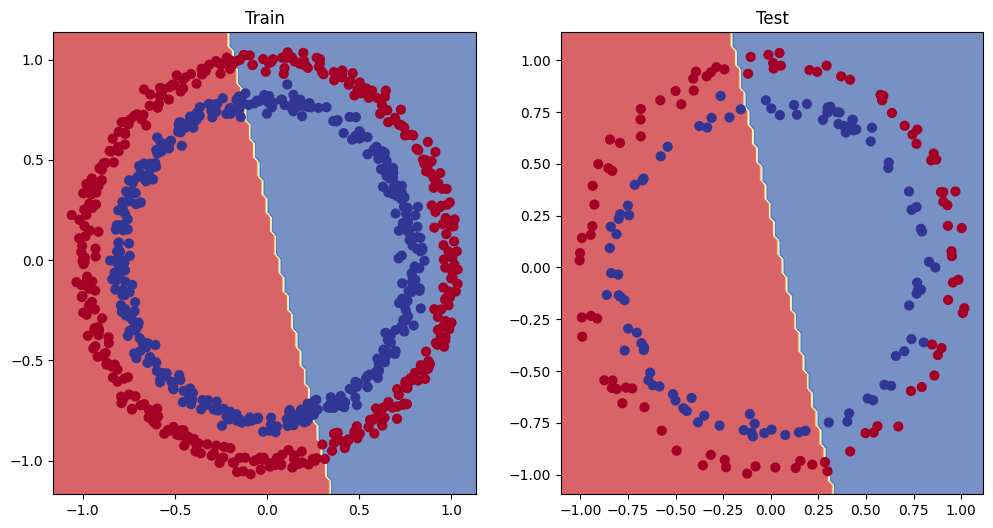

In [824]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is underfitting, meaning it's not learning predictive patterns from the data.

# 5. Improving a model (from a model perspective)
Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions (sigmoid)
* Change the learning rate
* Change the loss function

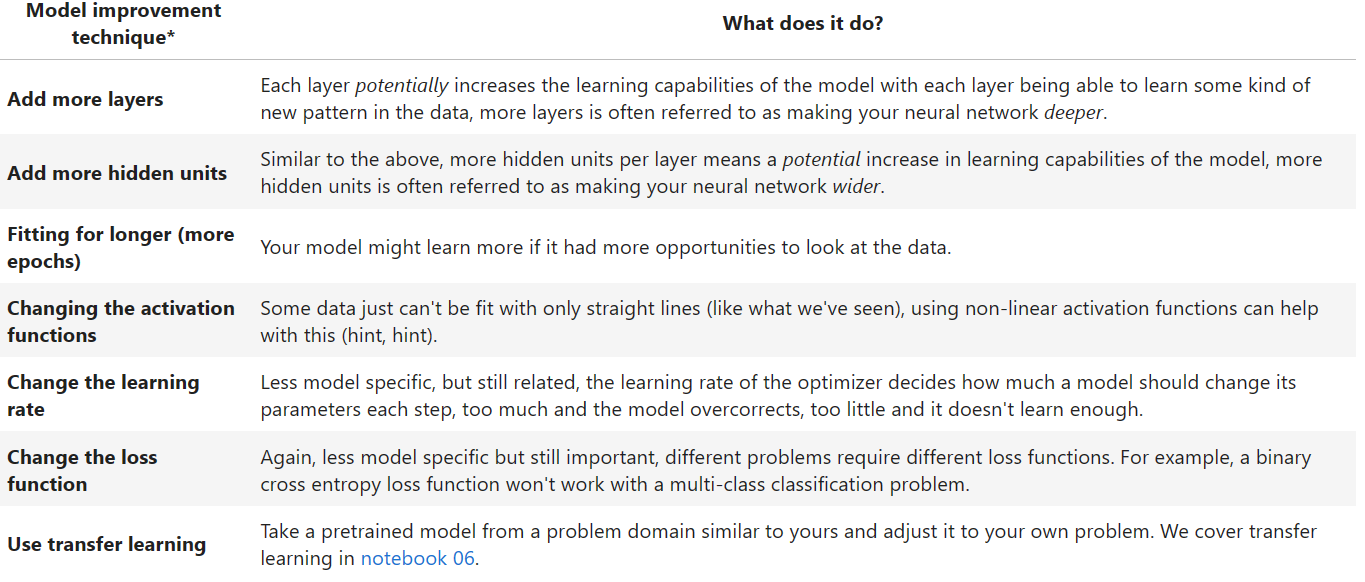

* Aggiungere più strati (layers): Aggiungere più strati (layer) alla rete neurale offre al modello più opportunità per apprendere dai dati. Strati aggiunti possono catturare relazioni più complesse e profonde nei dati, migliorando la capacità del modello di generalizzare e fare previsioni più accurate.

* Aumentare il numero di unità nascoste (hidden units): Le unità nascoste si riferiscono ai neuroni presenti nei layer nascosti della rete neurale. Aumentare il numero di unità nascoste permette al modello di avere maggiore flessibilità per catturare pattern complessi nei dati. Tuttavia, un numero eccessivo di unità nascoste può portare al rischio di overfitting.

* Aumentare il tempo di addestramento (fit for longer): Aumentare il numero di epoche o il tempo di addestramento consente al modello di vedere i dati più volte durante l'addestramento. Ciò può aiutare il modello a convergere verso una migliore soluzione e migliorare le prestazioni.

* Cambiare le funzioni di attivazione (activation functions): Le funzioni di attivazione determinano l'output di un neurone rispetto all'input ricevuto. Utilizzare funzioni di attivazione diverse, come la ReLU (Rectified Linear Unit) al posto della sigmoid, può avere un impatto sulla capacità del modello di apprendere e superare i problemi di vanishing gradient.

* Cambiare il tasso di apprendimento (learning rate): Il tasso di apprendimento controlla l'ampiezza degli aggiornamenti dei pesi durante l'ottimizzazione. Cambiare il tasso di apprendimento può influenzare la velocità di convergenza del modello e la stabilità dell'addestramento.

* Cambiare la funzione di loss (loss function): La funzione di loss misura quanto le previsioni del modello si discostano dai valori di target. Cambiare la funzione di loss può essere utile per adattare il modello a specifici problemi e obiettivi di addestramento, ad esempio, utilizzare una funzione di loss diversa per la classificazione rispetto alla regressione.

Let's see what happens if we add an extra layer to our model, fit for longer (epochs=1000 instead of epochs=100) and increase the number of hidden units from 5 to 10.

In [825]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [826]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [827]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


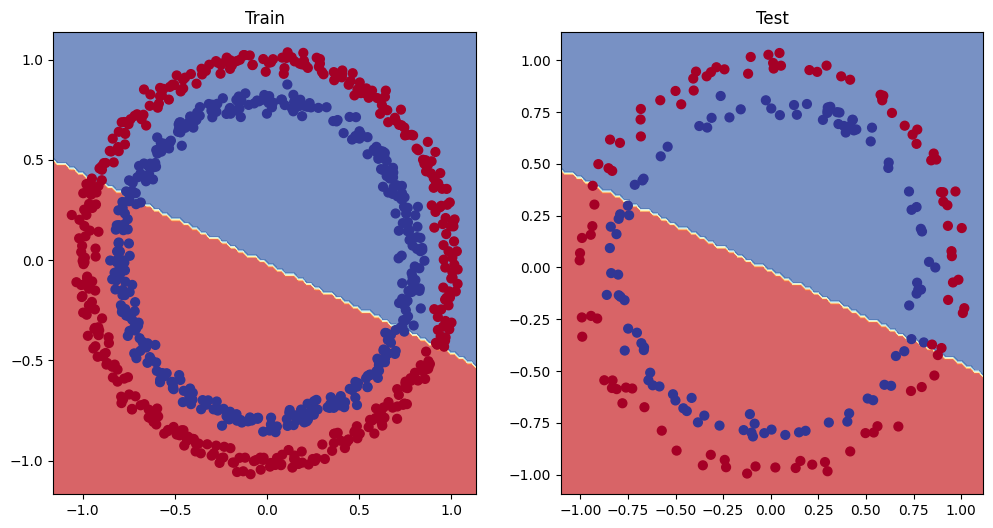

In [828]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Our model is still drawing a straight line between the red and blue dots.

If our model is drawing a straight line, could it model linear data? Like we did in notebook 01?

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [829]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epailon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [830]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

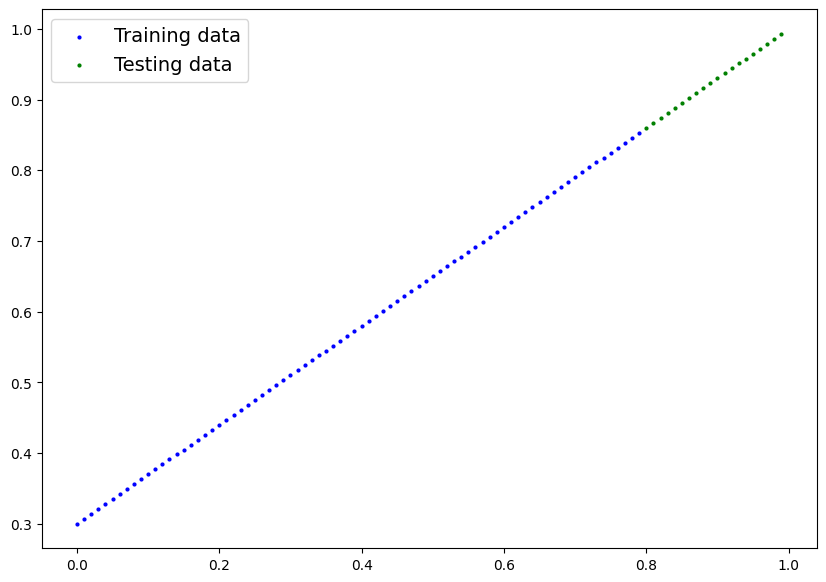

In [831]:
plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

### 5.2 Adjusting 'model_1' to fit a straight line

In [832]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [833]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.01)

In [834]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


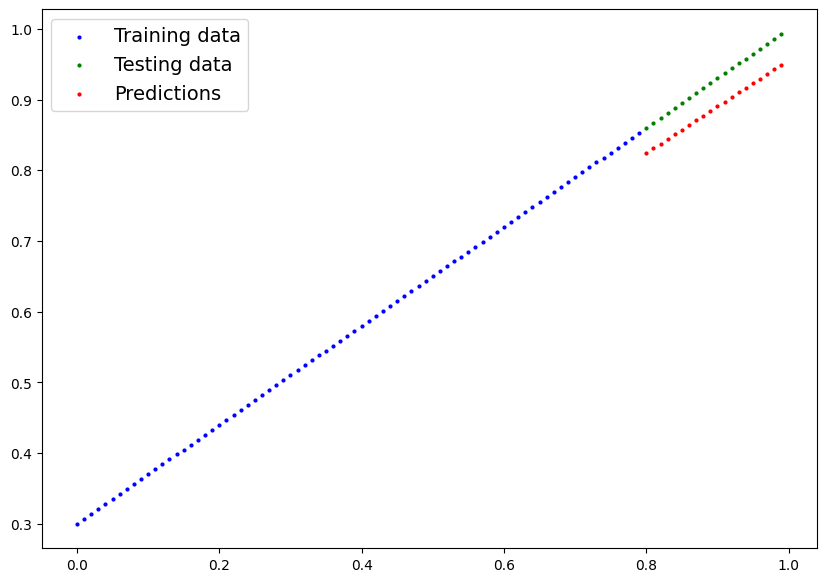

In [835]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# plot data and preditions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?


* "What patterns could you draw if you were given an infinite amount of straight and non-straight lines?" ("Quali pattern potresti disegnare se ti fosse data una quantità infinita di linee rette e non rette?")
Questo suggerisce che con un numero infinito di linee rette e non rette, saremmo in grado di rappresentare una vasta gamma di pattern e relazioni tra i dati. Le linee rette rappresentano relazioni lineari tra le variabili, mentre le linee non rette (curve e altre funzioni non lineari) permettono di rappresentare relazioni più complesse e modelli che non possono essere espressi solo con relazioni lineari.

* "Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?" ("O in termini di machine learning, un insieme infinito (anche se in realtà è finito) di funzioni lineari e non lineari?")
Questo commento si riferisce al fatto che nei modelli di machine learning, sia lineari che non lineari sono importanti per modellare e comprendere i dati. I modelli lineari possono essere utili per rappresentare relazioni semplici e dirette tra le feature, ma spesso sono limitati nel catturare pattern complessi. D'altra parte, le funzioni non lineari sono fondamentali per catturare relazioni più intricate e modelli complessi che possono rappresentare meglio i dati del mondo reale.

In [836]:
### 6.1 Recreating non-linear data (red and blue circles)

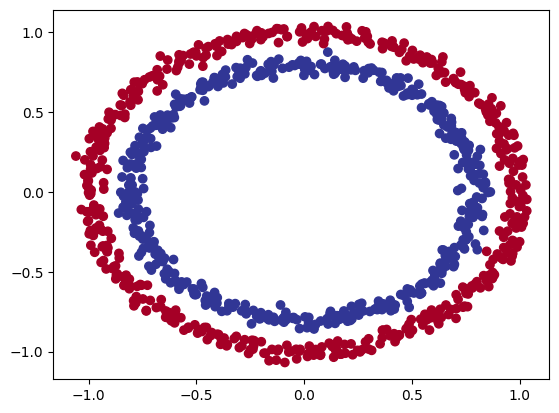

In [837]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [838]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight linear
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) funtion which are potentially able to find patterns in data

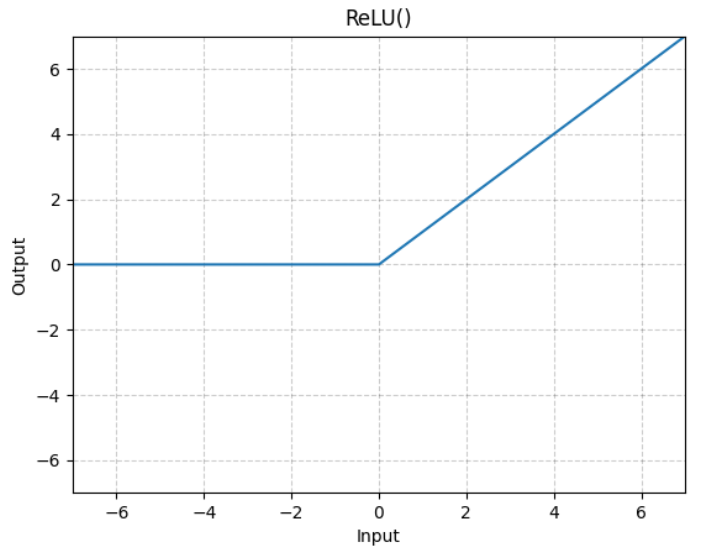

Le funzioni di attivazione (activation functions) sono componenti fondamentali nei modelli di reti neurali artificiali e sono utilizzate per introdurre non linearità nelle uscite dei neuroni. Esse determinano l'output di un neurone rispetto all'input ricevuto, aggiungendo flessibilità e capacità di apprendimento al modello. Senza l'utilizzo di funzioni di attivazione, una rete neurale sarebbe solo una combinazione lineare di layer lineari, rendendo il modello incapace di catturare pattern complessi nei dati.

Le funzioni di attivazione prendono in input la somma pesata delle feature di input e producono un'uscita per il neurone. Alcune delle funzioni di attivazione comuni utilizzate nelle reti neurali includono:

Sigmoid: La funzione sigmoide è definita come f(x) = 1 / (1 + e^(-x)). Produce un'uscita compresa nell'intervallo (0, 1). È spesso utilizzata nei problemi di classificazione binaria, poiché mappa qualsiasi valore in un range tra 0 e 1, permettendo di interpretare l'uscita come una probabilità.

ReLU (Rectified Linear Unit): La funzione ReLU è definita come f(x) = max(0, x). L'output è zero per tutti i valori negativi di input e coincide con l'input per i valori positivi. La ReLU è molto utilizzata nelle reti neurali a causa della sua semplicità e della capacità di evitare il problema del vanishing gradient.

Leaky ReLU: La funzione Leaky ReLU è simile alla ReLU, ma al contrario di annullare i valori negativi, essi vengono moltiplicati per una costante minima (ad esempio 0.01). Ciò evita il problema del dying ReLU (neuroni che rimangono inattivi) che potrebbe verificarsi con la ReLU.

Softmax: La funzione softmax viene utilizzata principalmente nei problemi di classificazione multiclasse. Converte un vettore di valori in una distribuzione di probabilità, in modo che la somma di tutte le probabilità sia 1. Ciò permette di interpretare l'output come la probabilità di appartenere a ciascuna classe.

In [839]:
# Build a model with non-linaìear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [840]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

Differenza tra Linear Activation e non-Linear Activation (ReLU)
Nel primo caso non avviene nessu apprendimento infatti test loss rimane alto.
Nel secondo caso c'è l'apprendimento infatto test loss diminuisce e training loss = test loss

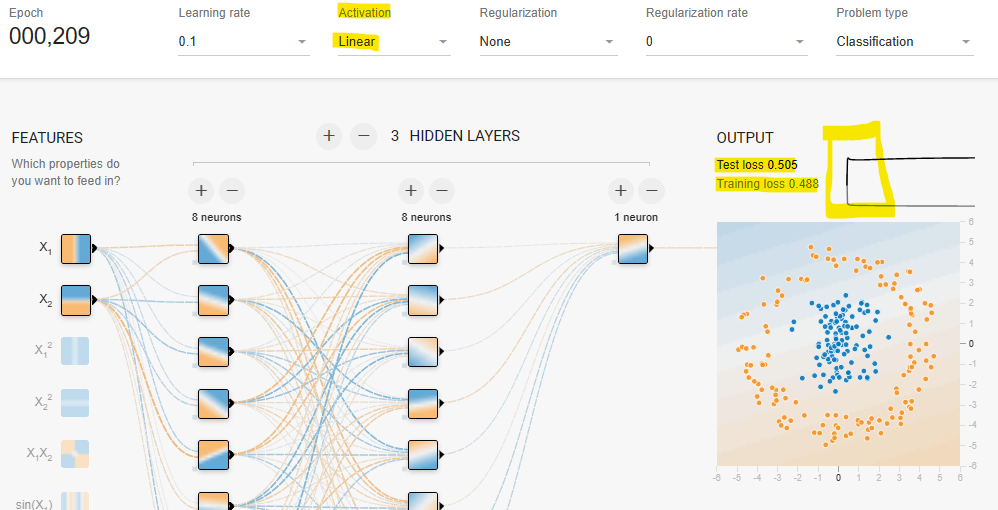

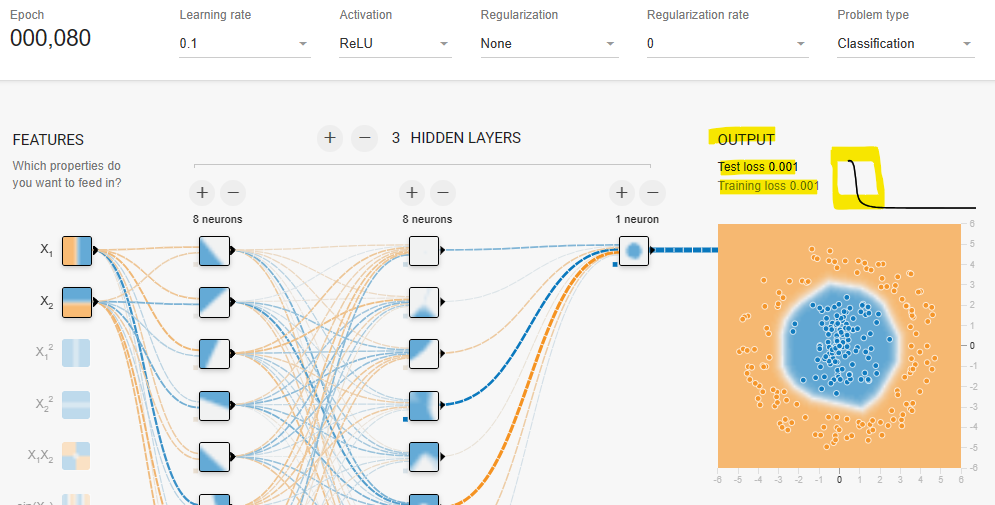

### 6.3 Training a model with non-linearity

In [841]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Foreard pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (take in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's this happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%


### 6.4 Evaluatining a model trained with non-linear activation funcions

In [842]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

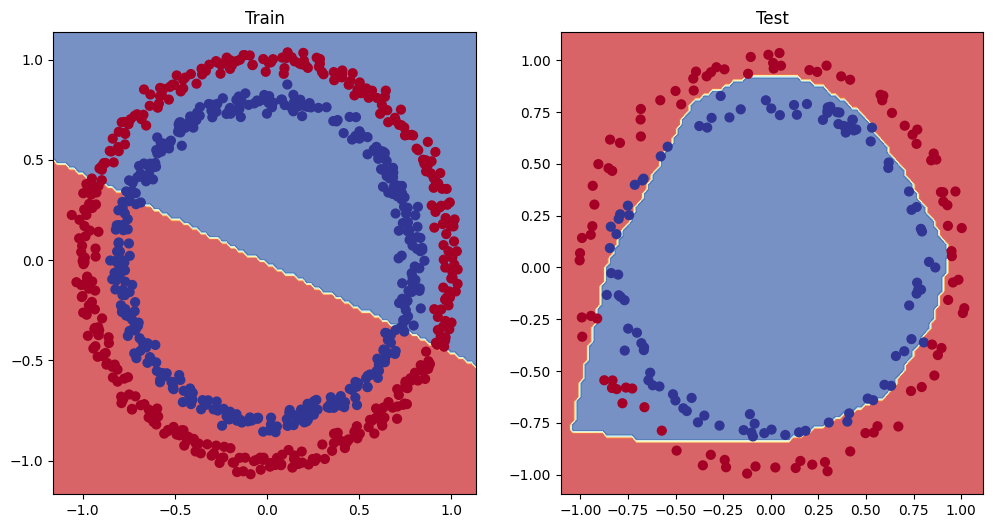

In [843]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-lineat functions

In [844]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype, A

(torch.float32,
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

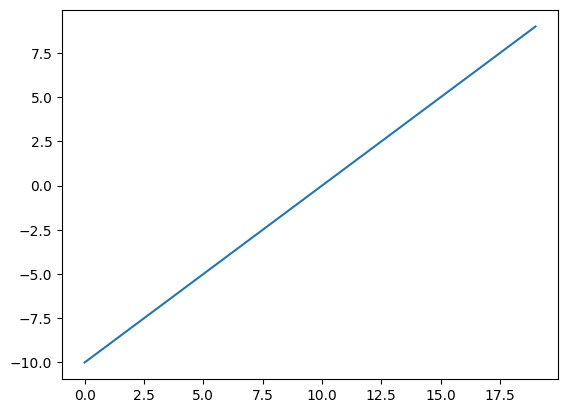

In [845]:
# Visualize the tensor
plt.plot(A)

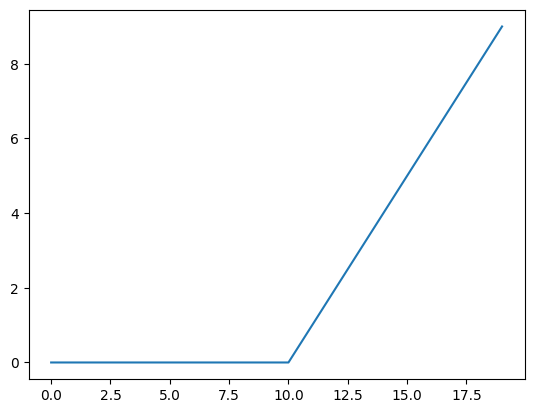

In [846]:
plt.plot(torch.relu(A))

In [847]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)  # ReLU (Rectified Linear Unit): La funzione ReLU è definita come f(x) = max(0, x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

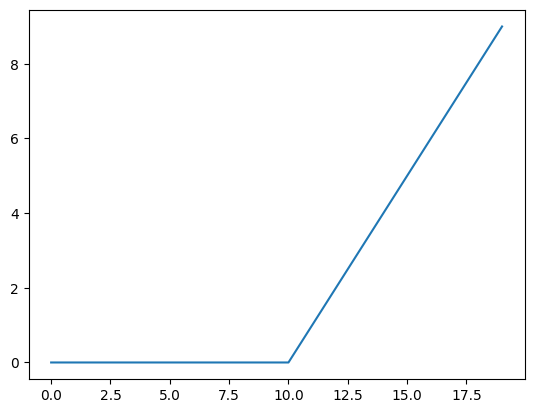

In [848]:
# Plot ReLU activation function
plt.plot(relu(A))

In [849]:
# Now let's do the same for Sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))  # Sigmoid: La funzione sigmoide è definita come f(x) = 1 / (1 + e^(-x)).

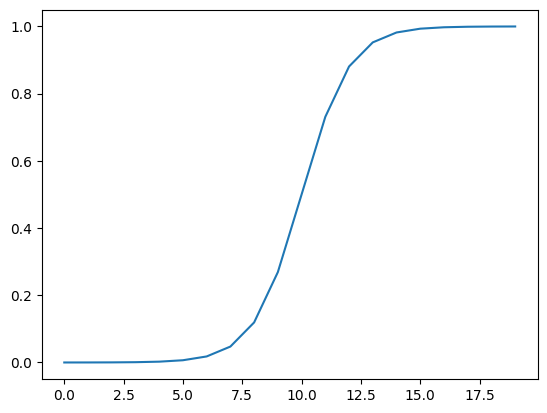

In [850]:
plt.plot(torch.sigmoid(A))

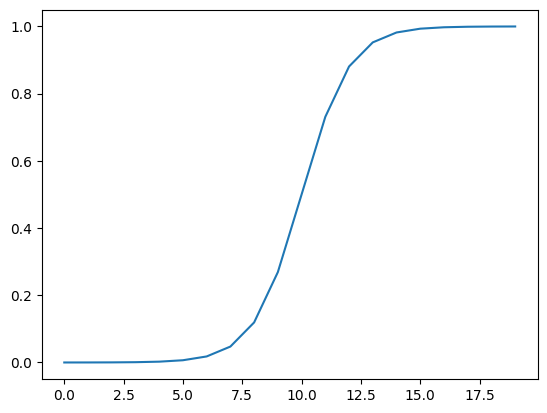

In [851]:
plt.plot(sigmoid(A))

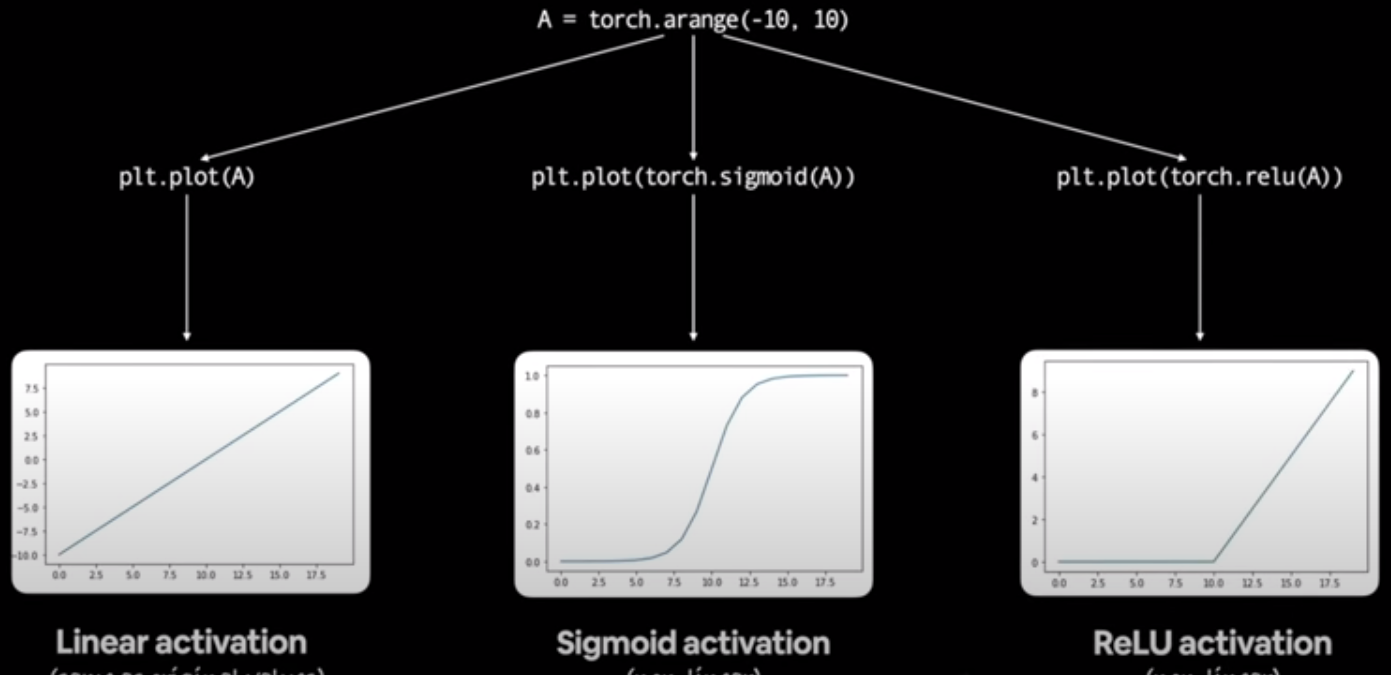

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

## 8.1 Creating a toy multi-class dataset

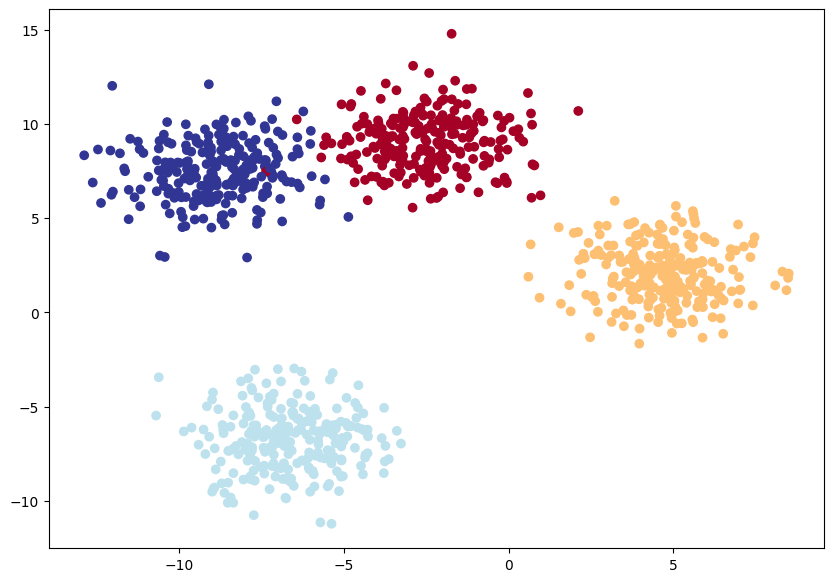

In [852]:
 # Import dependencies
 import torch
 import matplotlib.pyplot as plt
 from sklearn.datasets import make_blobs
 from sklearn.model_selection import train_test_split

 # Set the hyperrameters for data creation
 NUM_CLASSES = 4
 NUM_FEATURES = 2
 RANDOM_SEED = 42

 # 1. Create multi-class data
 X_blob, y_blob = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5,  # give the clusters a little shake up
                             random_state=RANDOM_SEED)

 # 2. Turn data into tensors
 X_blob = torch.from_numpy(X_blob).type(torch.float)
 y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

 # 3. Split into train and test
 X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                         y_blob,
                                                                         test_size=0.2,
                                                                         random_state=RANDOM_SEED)

 # 4. Plot data
 plt.figure(figsize=(10,7))
 plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a mult-class classification model in PyTorch

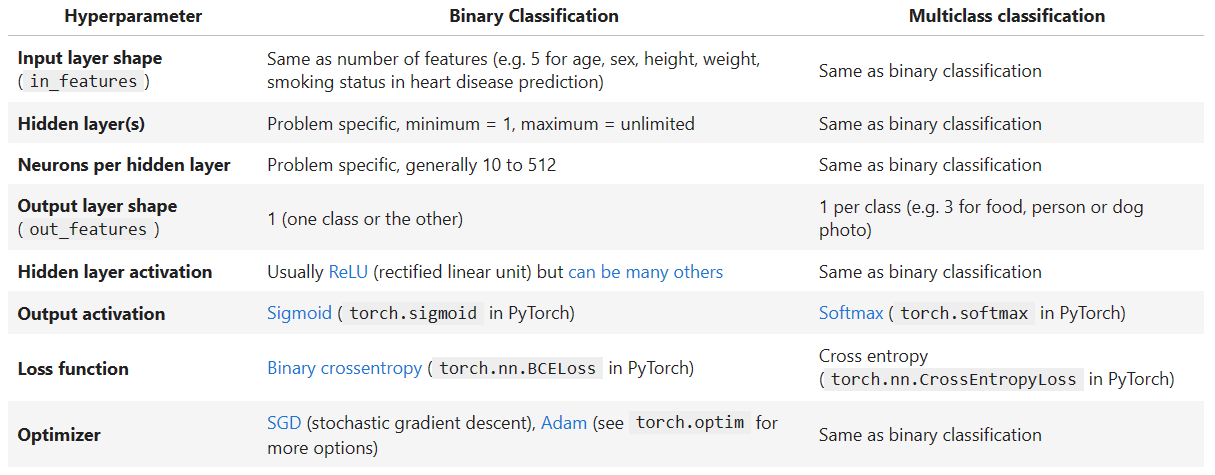

In [853]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [854]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? no, si possono separare i punti in modo lineare
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers?
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [855]:
X_blob_train.shape, y_blob_train[:5], torch.unique(y_blob_train)

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]), tensor([0, 1, 2, 3]))

### 8.3 Create a loss function and an optimezer for a multi-class classification model

In [856]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can chande

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert out model's outputs (logtis) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use 'torch.softmax') -> Pred labels (take the argmax of the prediction probabilities)

In [857]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

y_pred_probs[:5]: Questo è il tensore di probabilità di predizione ottenuto applicando la funzione softmax al tensore dei logits. Ogni valore nel tensore è una probabilità compresa tra 0 e 1. La somma delle probabilità di ciascuna istanza è 1. Inoltre, i valori sono normalizzati, permettendo di interpretarli come probabilità di appartenenza a ciascuna classe.

In [858]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [859]:
# Convert our model's predictin probabilities to prediction labels
# Prende ogni vettore e prende il valore più alto e quella la la classe o labels a cui si riferisce, esempio classe rosso o blu...
# dopo che è stata fatta la predizione il valore più si riferisce alla label.
# esempio: [0.1872, 0.2918, 0.1495, 0.3715] 0.3715 è il più alto quindi è la classe 3 (0,1,2,3), lo fa per tutti i vettori del tensore
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [860]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop an testing loop for a multi-class PyTorch model

In [861]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss =loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Accuracy: 65.50% | Test loss: 0.57861, Test acc: 95.50%
Epoch: 10 | Loss: 0.14398, Accuracy: 99.12% | Test loss: 0.13037, Test acc: 99.00%
Epoch: 20 | Loss: 0.08062, Accuracy: 99.12% | Test loss: 0.07216, Test acc: 99.50%
Epoch: 30 | Loss: 0.05924, Accuracy: 99.12% | Test loss: 0.05133, Test acc: 99.50%
Epoch: 40 | Loss: 0.04892, Accuracy: 99.00% | Test loss: 0.04098, Test acc: 99.50%
Epoch: 50 | Loss: 0.04295, Accuracy: 99.00% | Test loss: 0.03486, Test acc: 99.50%
Epoch: 60 | Loss: 0.03910, Accuracy: 99.00% | Test loss: 0.03083, Test acc: 99.50%
Epoch: 70 | Loss: 0.03643, Accuracy: 99.00% | Test loss: 0.02799, Test acc: 99.50%
Epoch: 80 | Loss: 0.03448, Accuracy: 99.00% | Test loss: 0.02587, Test acc: 99.50%
Epoch: 90 | Loss: 0.03300, Accuracy: 99.12% | Test loss: 0.02423, Test acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [862]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [863]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10], y_blob_test[:10]


# [2.3832e-03, 9.9762e-01, 9.9621e-12, 1.7071e-09]  -> 1
# [3.4166e-03, 1.2738e-10, 6.7180e-04, 9.9591e-01]  -> 3
# [2.6338e-12, 1.1023e-15, 9.9974e-01, 2.6383e-04]  -> 2

(tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
         [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
         [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
         [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
         [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
         [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
         [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
         [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
         [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
         [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

In [864]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

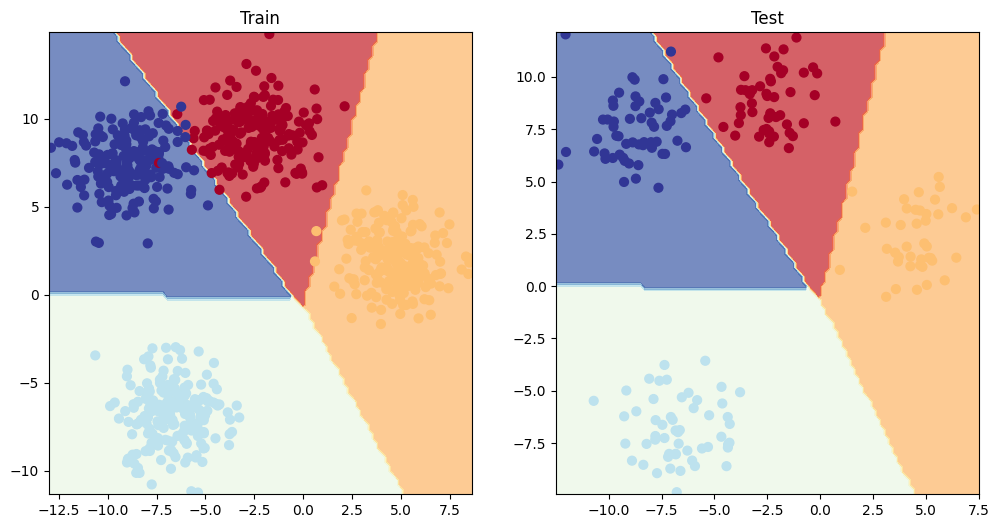

In [865]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* Fl-score
* Confusion matrix
* Classification report



Ecco una spiegazione breve per ogni metrica di valutazione della classificazione:

* Accuracy (accuratezza): Rappresenta la percentuale di campioni classificati correttamente dal modello rispetto al numero totale di campioni nel dataset di valutazione. È la metrica di valutazione più semplice ed è data dalla formula: (Numero di campioni correttamente classificati) / (Numero totale di campioni).

* Precision (precisione): Indica la percentuale di campioni classificati come positivi che sono effettivamente positivi. Aiuta a misurare la precisione del modello nelle previsioni positive ed è definita come: (Numero di veri positivi) / (Numero di veri positivi + Numero di falsi positivi).

* Recall (richiamo o sensibilità): Misura la percentuale di campioni positivi che sono stati correttamente identificati dal modello. Indica quanto il modello è sensibile nel trovare i veri positivi ed è calcolata come: (Numero di veri positivi) / (Numero di veri positivi + Numero di falsi negativi).

* F1-score (f1-score): È una media armonica tra precisione e richiamo e fornisce una singola misura del bilanciamento tra le due metriche. È utile quando si ha un trade-off tra precisione e richiamo. Il valore di F1-score è dato da: 2 * ((Precision * Recall) / (Precision + Recall)).

* Matrice di confusione: È una tabella che mostra il numero di previsioni corrette e sbagliate fatte dal modello per ciascuna classe. La matrice di confusione consente di comprendere meglio gli errori di classificazione del modello, evidenziando i veri positivi, falsi positivi, veri negativi e falsi negativi.

* Classification report (rapporto di classificazione): Fornisce un'analisi dettagliata delle metriche di valutazione per ciascuna classe del problema di classificazione. Include precisione, richiamo, F1-score e il supporto (numero di campioni) per ciascuna classe.

Queste metriche sono essenziali per valutare le prestazioni di un modello di classificazione e forniscono informazioni utili sulle sue capacità di previsione e sulle aree in cui potrebbe migliorare. A seconda del contesto e del tipo di problema di classificazione, alcune di queste metriche possono essere più rilevanti di altre, quindi è importante considerare tutte queste misure per ottenere una valutazione completa delle prestazioni del modello.

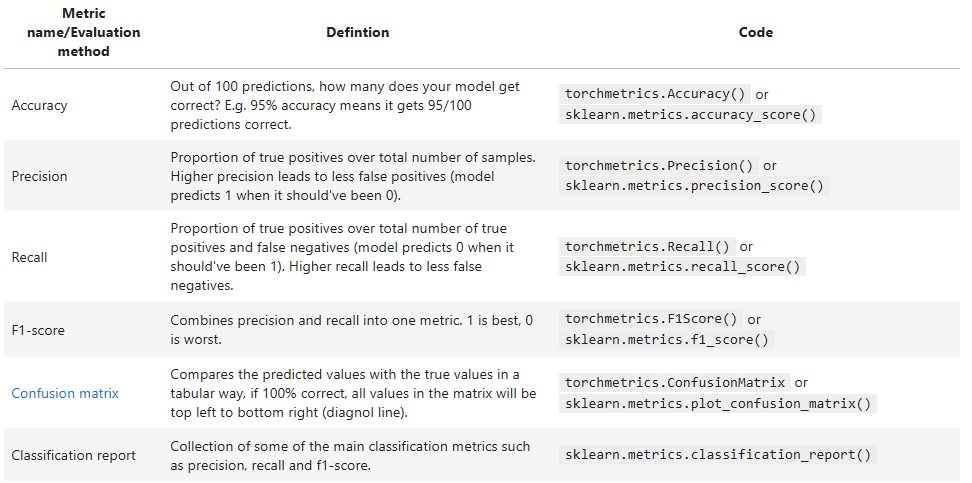

In [869]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')